<a href="https://colab.research.google.com/github/Song-ho-joon/Song-ho-joon.github.io/blob/master/250130_SLIC_SUPERPIXEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-image

In [2]:
from google.colab import files
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [5]:
uploaded = files.upload()

Saving flower.jpeg to flower.jpeg


User uploaded file "flower.jpeg" with length 48323 bytes


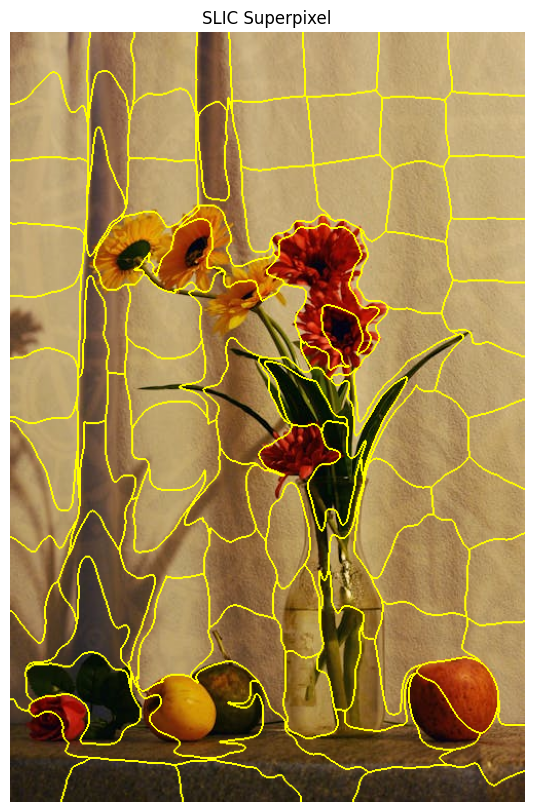

In [6]:
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # 이미지를 NumPy 배열로 변환
    image = io.imread(fn)
    image = img_as_float(image)

    # SLIC 적용
    segments = slic(image, n_segments=100, sigma=5)

    # 결과 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(mark_boundaries(image, segments))
    plt.axis('off')
    plt.title('SLIC Superpixel')
    plt.show()

Saving flower.jpeg to flower (2).jpeg


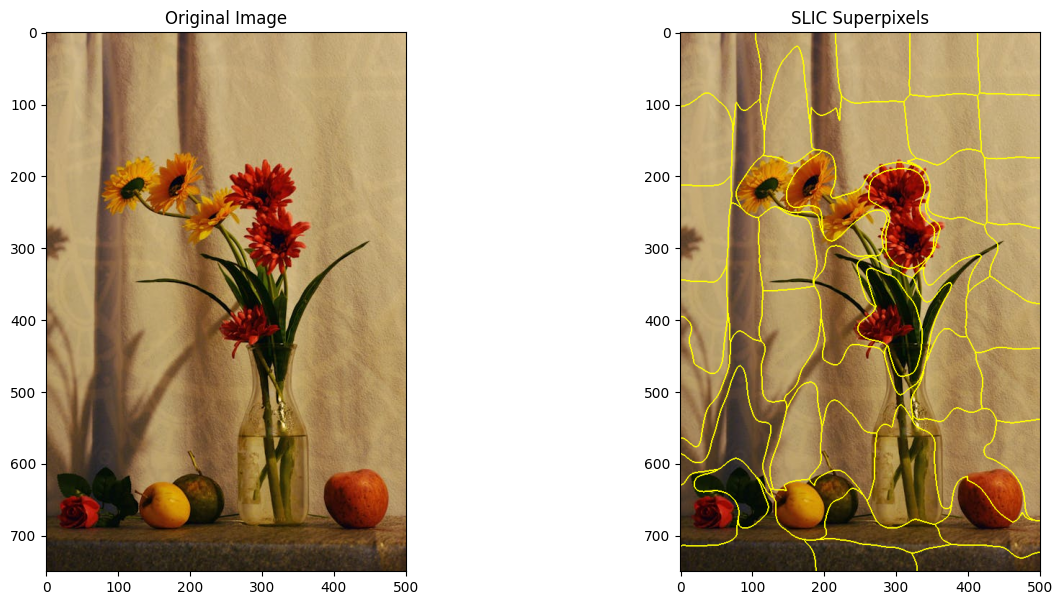

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


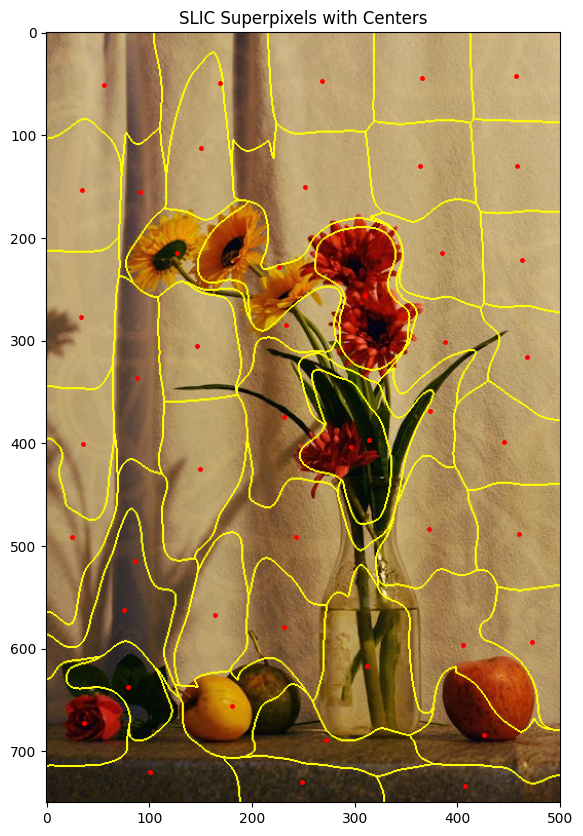

In [8]:
from google.colab import files
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# 사용자로부터 이미지 업로드 받기
uploaded = files.upload()

# 업로드된 이미지 처리
for filename in uploaded.keys():
    # 이미지를 NumPy 배열로 변환
    image = io.imread(filename)
    image = img_as_float(image)

    # SLIC 알고리즘 적용
    segments = slic(image, n_segments=50, sigma=10)

    # 결과 시각화
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[1].imshow(mark_boundaries(image, segments))
    ax[1].set_title('SLIC Superpixels')
    plt.show()

    # Superpixel 중심 시각화
    centers = np.array([np.mean(np.nonzero(segments == i), axis=1) for i in range(segments.max() + 1)])
    plt.figure(figsize=(10, 10))
    plt.imshow(mark_boundaries(image, segments))
    plt.plot(centers[:, 1], centers[:, 0], 'r.', markersize=5)
    plt.title('SLIC Superpixels with Centers')
    plt.show()


Saving flower.jpeg to flower (8).jpeg
86


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

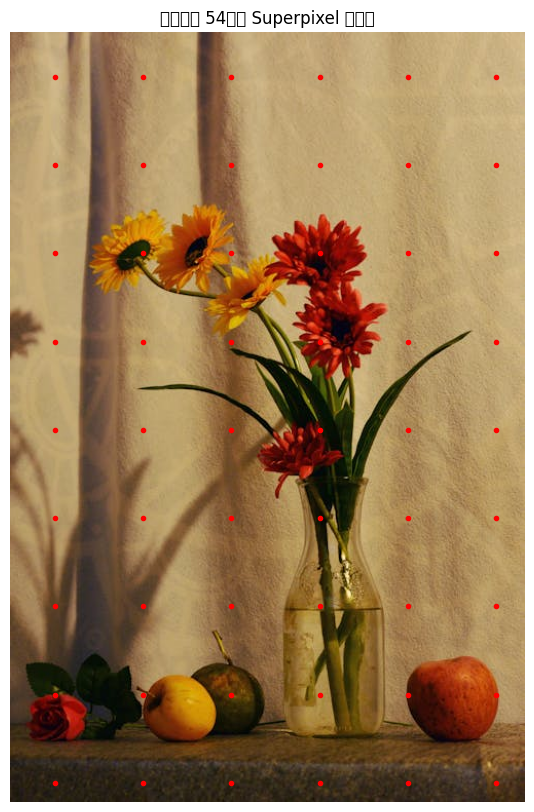

In [14]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2lab

# 이미지 업로드
uploaded = files.upload()

# 업로드된 이미지 처리
for filename in uploaded.keys():
    # 이미지를 NumPy 배열로 변환
    image = io.imread(filename)

    # 이미지를 LAB 색공간으로 변환
    lab_image = rgb2lab(image)

    # 파라미터 설정
    K = 50 # 원하는 superpixel 개수

    # 격자 간격 계산
    height, width = lab_image.shape[:2]
    N = height * width
    S = int((N / K)**0.5)

    # 중심점 초기화
    centers = []
    for y in range(S // 2, height, S):
        for x in range(S // 2, width, S):
            centers.append([y, x])
    print(S)
    # 결과 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for center in centers:
        y, x = center
        plt.plot(x, y, 'r.')
    plt.title(f'초기화된 {len(centers)}개의 Superpixel 중심점')
    plt.axis('off')
    plt.show()


In [11]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# 이미지 업로드
uploaded = files.upload()

# 업로드된 이미지 처리
for filename in uploaded.keys():
    # 이미지를 NumPy 배열로 변환
    image = io.imread(filename)

    # 이미지 크기 출력
    height, width = image.shape[:2]
    print(f"업로드된 이미지 크기: {width}x{height} 픽셀")
    print(f"총 픽셀 수: {width * height}")

    # 이미지를 LAB 색공간으로 변환
    lab_image = color.rgb2lab(image)

    # SLIC 알고리즘 구현
    def slic_superpixels(image, n_segments, compactness):
        height, width = image.shape[:2]

        # 초기 클러스터 중심 설정
        S = int((height * width / n_segments)**0.5)
        centers = []
        for y in range(S // 2, height, S):
            for x in range(S // 2, width, S):
                centers.append([y, x] + list(image[y, x]))
        centers = np.array(centers)

        # 그래디언트 계산
        def compute_gradient(image):
            grad_y = np.diff(image, axis=0, prepend=image[0:1])
            grad_x = np.diff(image, axis=1, prepend=image[:, 0:1])
            return np.sum(grad_y**2 + grad_x**2, axis=2)

        gradient = compute_gradient(image)

        # 클러스터 중심 이동
        for i in range(len(centers)):
            y, x = int(centers[i][0]), int(centers[i][1])
            window = gradient[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)]
            new_y, new_x = np.unravel_index(window.argmin(), window.shape)
            centers[i] = [y-1+new_y, x-1+new_x] + list(image[y-1+new_y, x-1+new_x])

        # 메인 SLIC 알고리즘
        distances = np.full((height, width), np.inf)
        labels = np.full((height, width), -1)

        for iteration in range(10):  # 10회 반복
            for i, center in enumerate(centers):
                y_min, y_max = max(center[0] - S, 0), min(center[0] + S, height)
                x_min, x_max = max(center[1] - S, 0), min(center[1] + S, width)

                crop = image[y_min:y_max, x_min:x_max]
                d_lab = np.sum((crop - center[2:5])**2, axis=2)
                d_xy = (np.indices((y_max-y_min, x_max-x_min)).transpose(1,2,0) + [y_min, x_min] - center[:2])**2
                D = d_lab + compactness / S**2 * np.sum(d_xy, axis=2)

                mask = D < distances[y_min:y_max, x_min:x_max]
                distances[y_min:y_max, x_min:x_max][mask] = D[mask]
                labels[y_min:y_max, x_min:x_max][mask] = i

            # 새로운 중심 계산
            for i in range(len(centers)):
                mask = labels == i
                if np.any(mask):
                    centers[i] = [np.mean(np.where(mask)[0]), np.mean(np.where(mask)[1])] + list(np.mean(image[mask], axis=0))

        return labels

    # SLIC 알고리즘 적용
    n_segments = 100  # 원하는 superpixel 개수
    compactness = 10  # 컴팩트니스 파라미터
    segments = slic_superpixels(lab_image, n_segments, compactness)

    # 결과 시각화
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[1].imshow(mark_boundaries(image, segments))
    ax[1].set_title(f'SLIC with {n_segments} superpixels')
    plt.show()

    # Superpixel 중심 시각화
    centers = np.array([np.mean(np.nonzero(segments == i), axis=1) for i in range(segments.max() + 1)])
    plt.figure(figsize=(10, 10))
    plt.imshow(mark_boundaries(image, segments))
    plt.plot(centers[:, 1], centers[:, 0], 'r.', markersize=5)
    plt.title('SLIC Superpixels with Centers')
    plt.show()


Saving flower.jpeg to flower (5).jpeg
업로드된 이미지 크기: 501x750 픽셀
총 픽셀 수: 375750


TypeError: slice indices must be integers or None or have an __index__ method

Saving flower.jpeg to flower (6).jpeg
업로드된 이미지 크기: 501x750 픽셀
총 픽셀 수: 375750


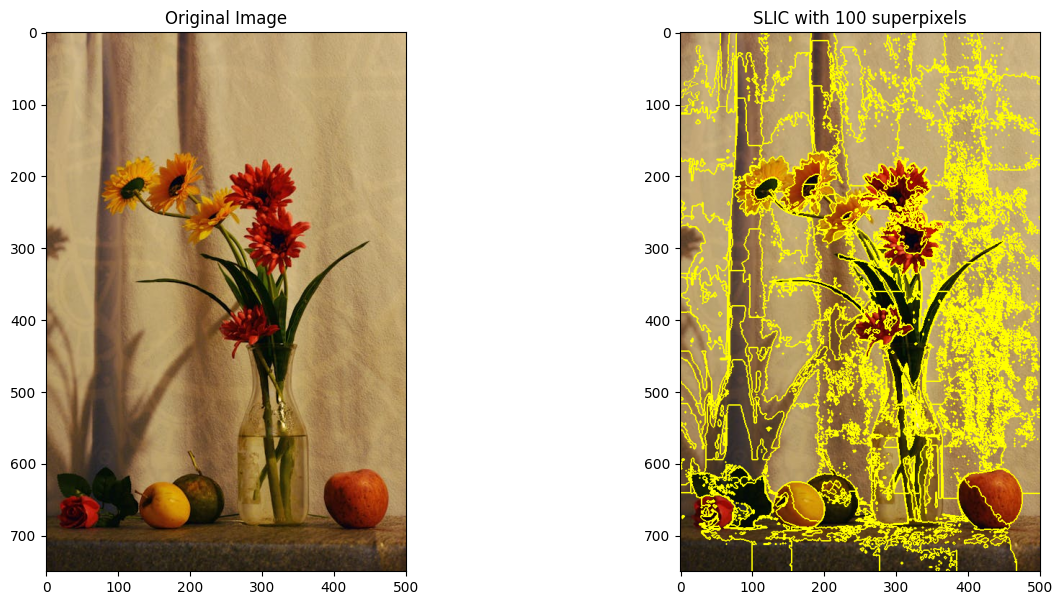

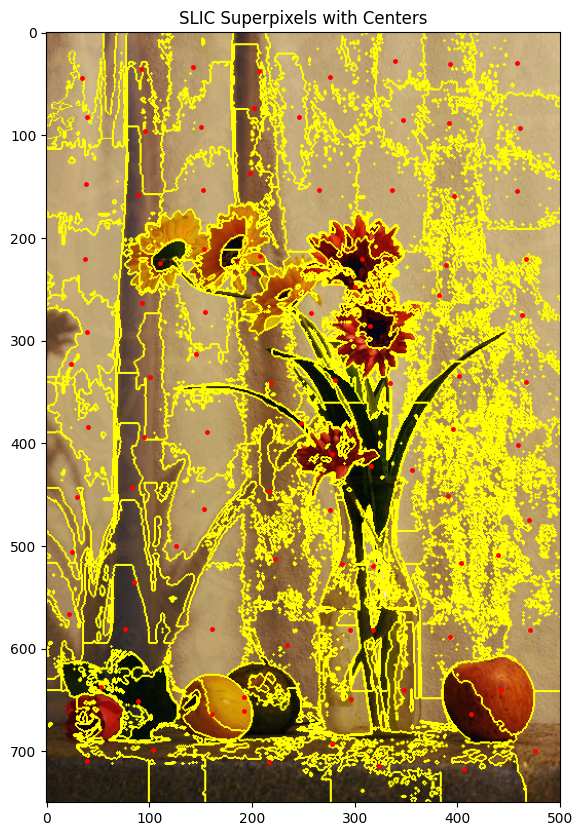

In [12]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# 이미지 업로드
uploaded = files.upload()

# 업로드된 이미지 처리
for filename in uploaded.keys():
    # 이미지를 NumPy 배열로 변환
    image = io.imread(filename)

    # 이미지 크기 출력
    height, width = image.shape[:2]
    print(f"업로드된 이미지 크기: {width}x{height} 픽셀")
    print(f"총 픽셀 수: {width * height}")

    # 이미지를 LAB 색공간으로 변환
    lab_image = color.rgb2lab(image)

    # SLIC 알고리즘 구현
    def slic_superpixels(image, n_segments, compactness):
        height, width = image.shape[:2]

        # 초기 클러스터 중심 설정
        S = int((height * width / n_segments)**0.5)
        centers = []
        for y in range(S // 2, height, S):
            for x in range(S // 2, width, S):
                centers.append([y, x] + list(image[y, x]))
        centers = np.array(centers)

        # 그래디언트 계산
        def compute_gradient(image):
            grad_y = np.diff(image, axis=0, prepend=image[0:1])
            grad_x = np.diff(image, axis=1, prepend=image[:, 0:1])
            return np.sum(grad_y**2 + grad_x**2, axis=2)

        gradient = compute_gradient(image)

        # 클러스터 중심 이동
        for i in range(len(centers)):
            y, x = int(centers[i][0]), int(centers[i][1])
            window = gradient[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)]
            new_y, new_x = np.unravel_index(window.argmin(), window.shape)
            centers[i] = [y-1+new_y, x-1+new_x] + list(image[y-1+new_y, x-1+new_x])

        # 메인 SLIC 알고리즘
        distances = np.full((height, width), np.inf)
        labels = np.full((height, width), -1)

        for iteration in range(10):  # 10회 반복
            for i, center in enumerate(centers):
                y_min, y_max = max(int(center[0]) - S, 0), min(int(center[0]) + S, height)
                x_min, x_max = max(int(center[1]) - S, 0), min(int(center[1]) + S, width)

                crop = image[y_min:y_max, x_min:x_max]
                d_lab = np.sum((crop - center[2:5])**2, axis=2)
                d_xy = (np.indices((y_max-y_min, x_max-x_min)).transpose(1,2,0) + [y_min, x_min] - center[:2])**2
                D = d_lab + compactness / S**2 * np.sum(d_xy, axis=2)

                mask = D < distances[y_min:y_max, x_min:x_max]
                distances[y_min:y_max, x_min:x_max][mask] = D[mask]
                labels[y_min:y_max, x_min:x_max][mask] = i

            # 새로운 중심 계산
            for i in range(len(centers)):
                mask = labels == i
                if np.any(mask):
                    centers[i] = [np.mean(np.where(mask)[0]), np.mean(np.where(mask)[1])] + list(np.mean(image[mask], axis=0))

        return labels

    # SLIC 알고리즘 적용
    n_segments = 100  # 원하는 superpixel 개수
    compactness = 10  # 컴팩트니스 파라미터
    segments = slic_superpixels(lab_image, n_segments, compactness)

    # 결과 시각화
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[1].imshow(mark_boundaries(image, segments))
    ax[1].set_title(f'SLIC with {n_segments} superpixels')
    plt.show()

    # Superpixel 중심 시각화
    centers = np.array([np.mean(np.nonzero(segments == i), axis=1) for i in range(segments.max() + 1)])
    plt.figure(figsize=(10, 10))
    plt.imshow(mark_boundaries(image, segments))
    plt.plot(centers[:, 1], centers[:, 0], 'r.', markersize=5)
    plt.title('SLIC Superpixels with Centers')
    plt.show()


Saving flower.jpeg to flower (7).jpeg


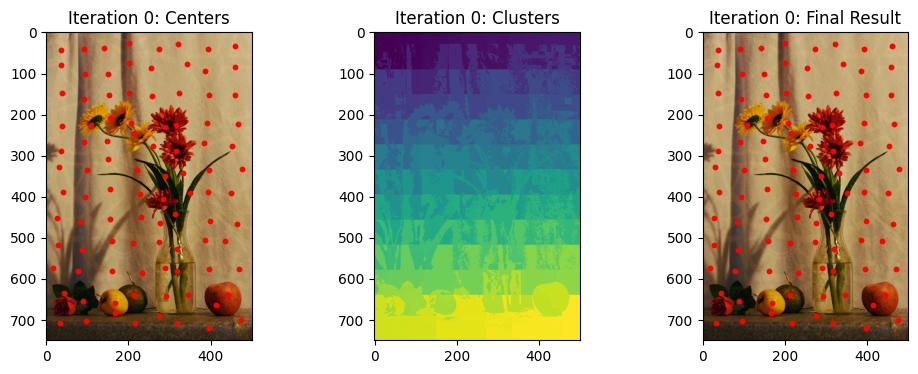

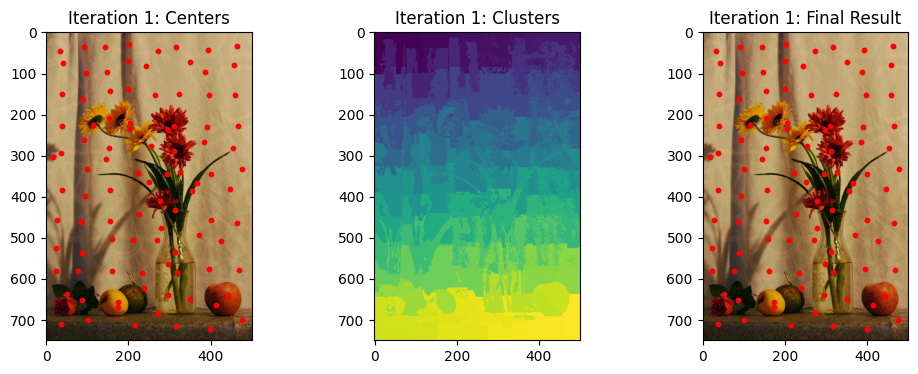

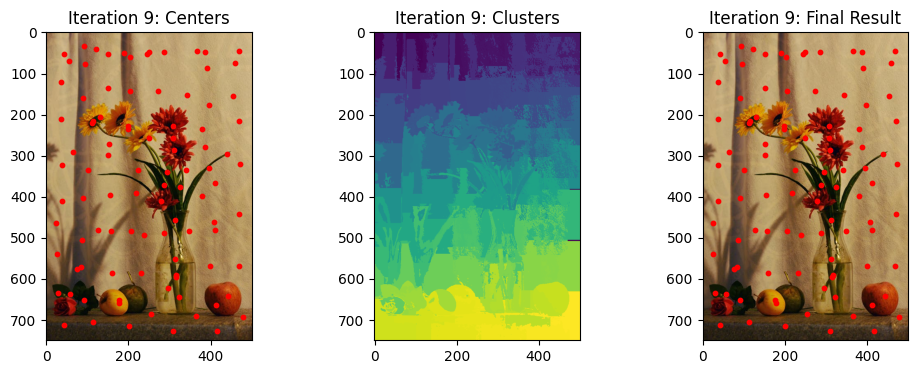

SLIC 알고리즘 완료


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 이미지 로드 및 전처리
filename = list(uploaded.keys())[0]
image = io.imread(filename)
lab_image = color.rgb2lab(image)

# 파라미터 설정
K = 100  # 원하는 superpixel 개수
max_iterations = 10

# 2. S 계산 및 초기 center 설정
height, width = lab_image.shape[:2]
N = height * width
S = int((N / K)**0.5)

centers = []
for y in range(S // 2, height, S):
    for x in range(S // 2, width, S):
        centers.append([y, x, lab_image[y, x][0], lab_image[y, x][1], lab_image[y, x][2]])
centers = np.array(centers)

# 3-4. 낮은 그래디언트 위치로 center 이동
def move_centers(centers, image):
    for i, center in enumerate(centers):
        y, x = int(center[0]), int(center[1])
        window = image[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)]
        grad = np.sum(np.abs(window - image[y, x]), axis=2)
        new_y, new_x = np.unravel_index(grad.argmin(), grad.shape)
        centers[i] = [y-1+new_y, x-1+new_x] + list(image[y-1+new_y, x-1+new_x])
    return centers

# 5-6. Ds 계산 및 픽셀 할당
def assign_pixels_to_centers(image, centers, S):
    height, width = image.shape[:2]
    distances = np.full((height, width), np.inf)
    clusters = np.zeros((height, width), dtype=int)
    for i, center in enumerate(centers):
        y_min, y_max = max(int(center[0]) - S, 0), min(int(center[0]) + S, height)
        x_min, x_max = max(int(center[1]) - S, 0), min(int(center[1]) + S, width)
        dist = np.sum((image[y_min:y_max, x_min:x_max] - center[2:5])**2, axis=2)
        mask = dist < distances[y_min:y_max, x_min:x_max]
        distances[y_min:y_max, x_min:x_max][mask] = dist[mask]
        clusters[y_min:y_max, x_min:x_max][mask] = i
    return clusters

# 7. 새로운 center 계산
def update_centers(image, clusters, centers):
    for i, center in enumerate(centers):
        mask = clusters == i
        if np.any(mask):
            centers[i] = [np.mean(np.where(mask)[0]), np.mean(np.where(mask)[1])] + \
                         list(np.mean(image[mask], axis=0))
    return centers

# 시각화 함수
def visualize_centers(image, centers, clusters, iteration):
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.imshow(color.lab2rgb(image))
    plt.scatter(centers[:, 1], centers[:, 0], c='red', s=10)
    plt.title(f'Iteration {iteration}: Centers')
    plt.subplot(132)
    plt.imshow(clusters, cmap='viridis')
    plt.title(f'Iteration {iteration}: Clusters')
    plt.subplot(133)
    plt.imshow(color.lab2rgb(image))
    for center in centers:
        plt.scatter(center[1], center[0], c='red', s=10)
    plt.title(f'Iteration {iteration}: Final Result')
    plt.show()

# 메인 루프
centers = move_centers(centers, lab_image)
for iteration in range(max_iterations):
    clusters = assign_pixels_to_centers(lab_image, centers, S)
    centers = update_centers(lab_image, clusters, centers)
    if iteration in [0, 1, max_iterations-1]:
        visualize_centers(lab_image, centers, clusters, iteration)

print("SLIC 알고리즘 완료")
